In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
df= pd.read_csv('insurance_part2_data.csv')

In [3]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [5]:
df.shape

(3000, 10)

In [6]:
df.duplicated().sum()

139

In [7]:
#checking duplicates
df[df.duplicated()==True]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [8]:
df.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [39]:
df.skew()

Age           1.149713
Commision     3.148858
Duration     13.784681
Sales         2.381148
dtype: float64

In [9]:
df.Claimed.value_counts()

No     2076
Yes     924
Name: Claimed, dtype: int64

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Claimed', ylabel='count'>

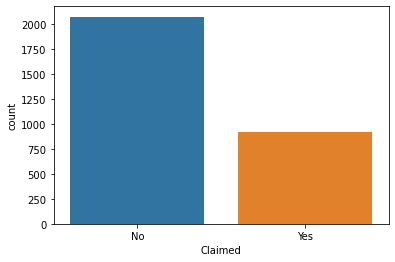

In [11]:
sns.countplot(df.Claimed)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product Name', ylabel='count'>

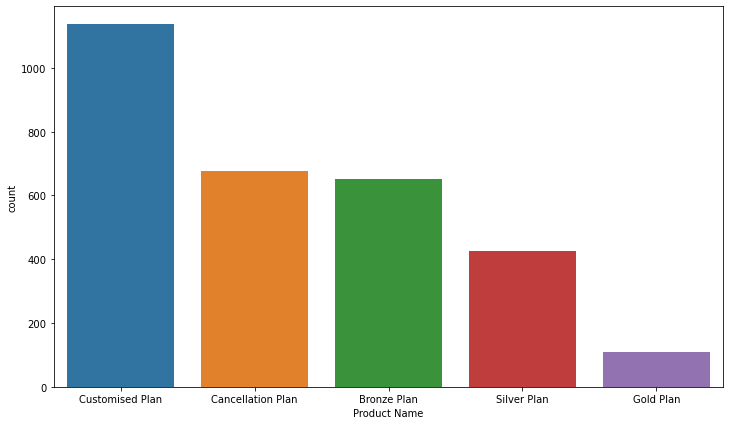

In [12]:
plt.figure(figsize=(12,7))
sns.countplot(df['Product Name'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product Name', ylabel='Sales'>

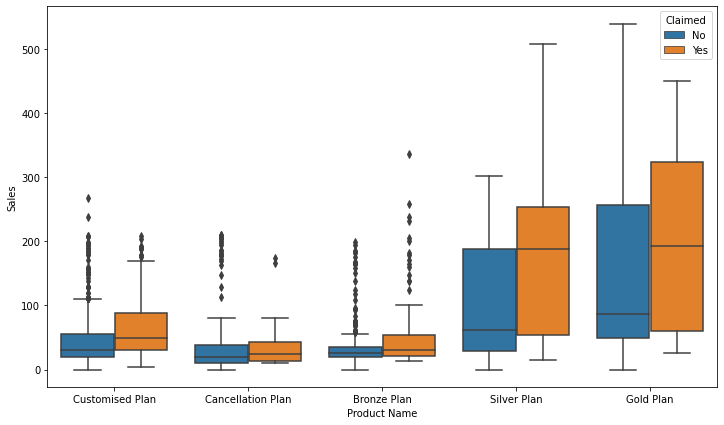

In [20]:
plt.figure(figsize=(12,7))
sns.boxplot('Product Name','Sales',hue='Claimed',data=df)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product Name', ylabel='Sales'>

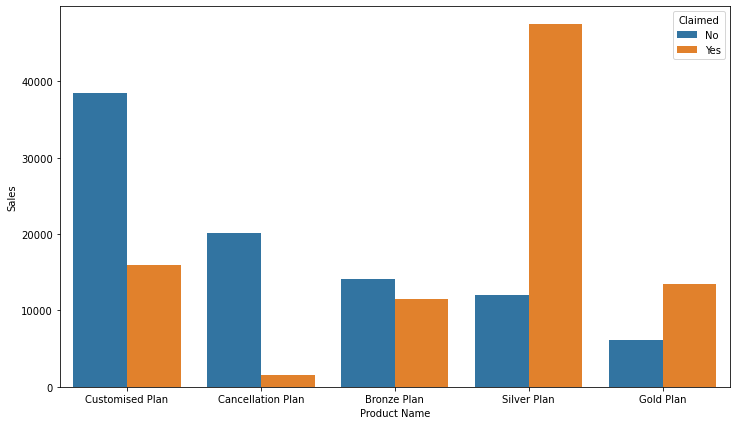

In [52]:
plt.figure(figsize=(12,7))
sns.barplot('Product Name','Sales',hue='Claimed',data=df,estimator=np.sum,ci=None)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Destination', ylabel='count'>

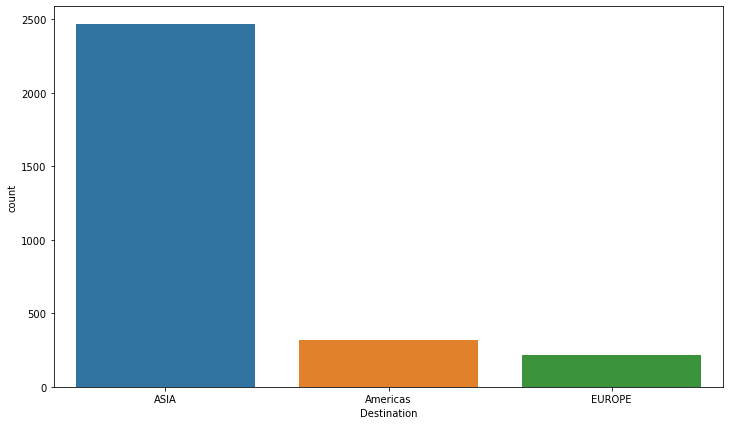

In [21]:
plt.figure(figsize=(12,7))
sns.countplot(df['Destination'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Destination', ylabel='Sales'>

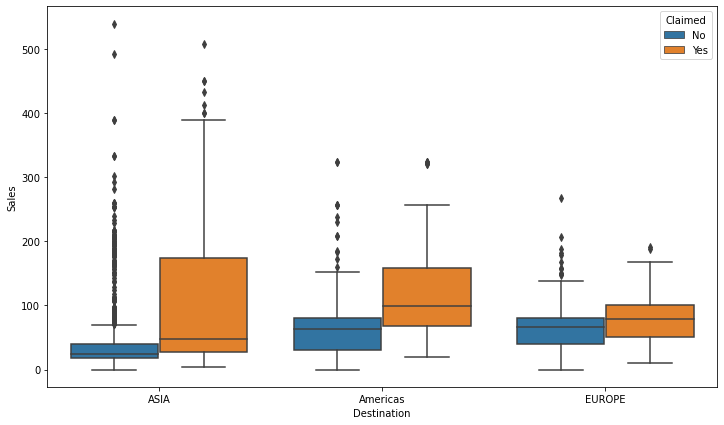

In [22]:
plt.figure(figsize=(12,7))
sns.boxplot('Destination','Sales',hue='Claimed',data=df)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Destination', ylabel='Sales'>

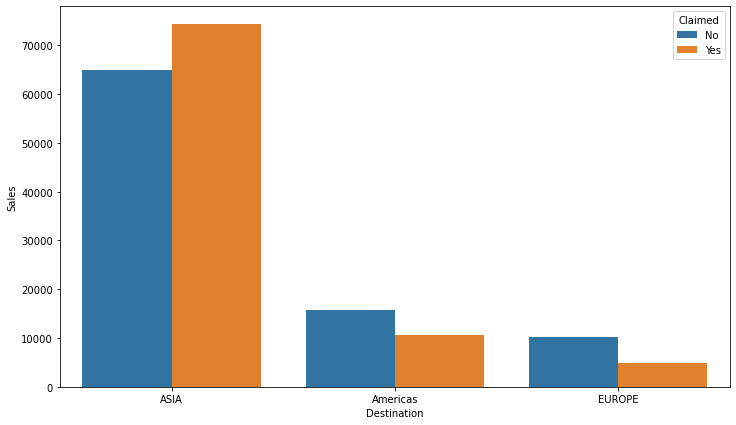

In [53]:
plt.figure(figsize=(12,7))
sns.barplot('Destination','Sales',hue='Claimed',data=df,estimator=np.sum,ci=None)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Channel', ylabel='count'>

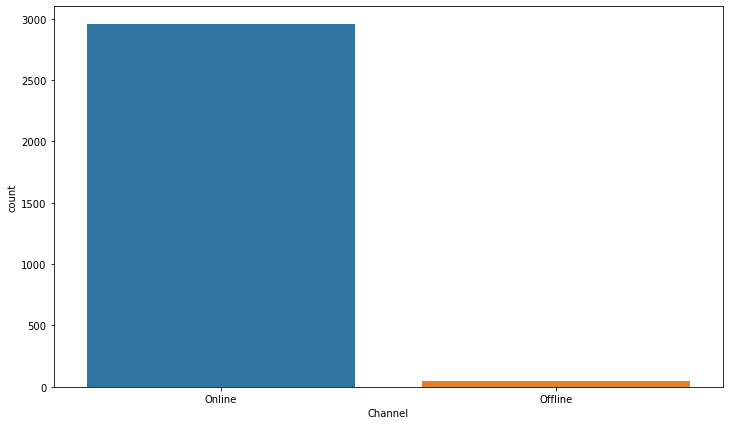

In [23]:
plt.figure(figsize=(12,7))
sns.countplot(df['Channel'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Channel', ylabel='Sales'>

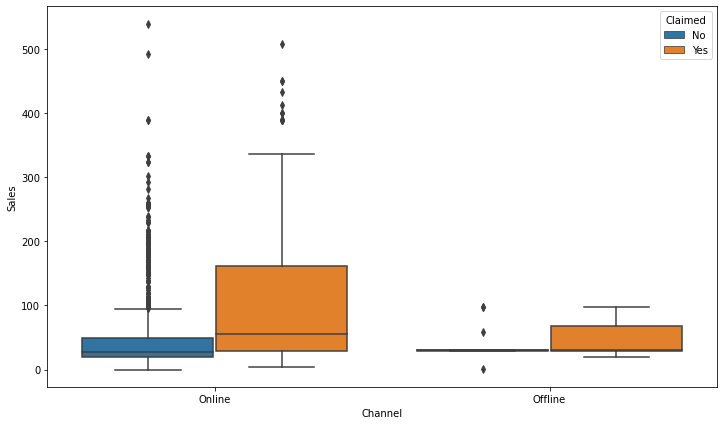

In [24]:
plt.figure(figsize=(12,7))
sns.boxplot('Channel','Sales',hue='Claimed',data=df)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Channel', ylabel='Sales'>

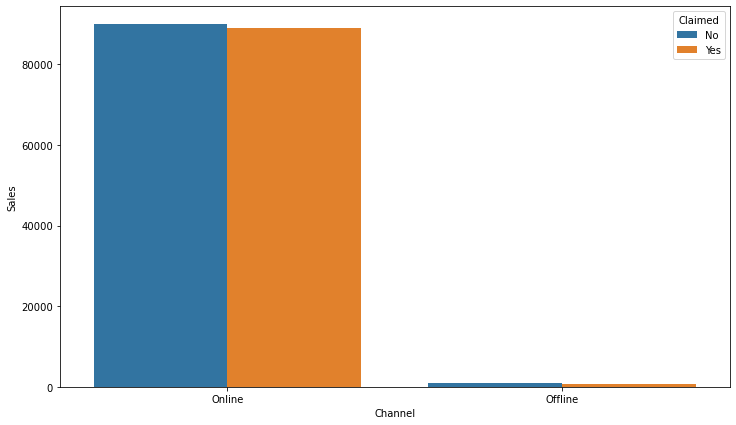

In [54]:
plt.figure(figsize=(12,7))
sns.barplot('Channel','Sales',hue='Claimed',data=df,estimator=np.sum,ci=None)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Agency_Code', ylabel='count'>

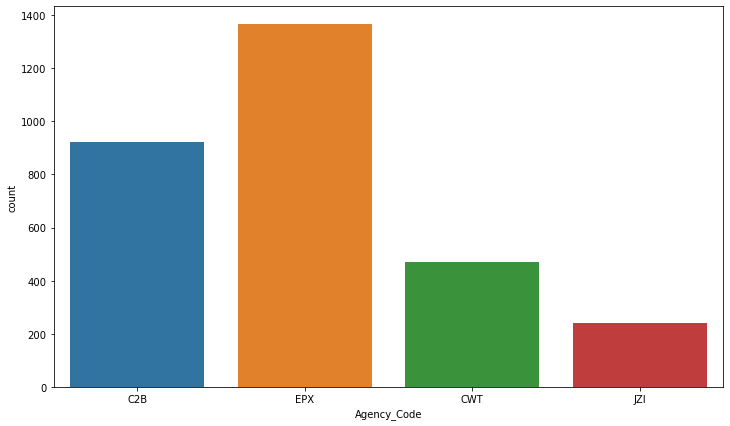

In [25]:
plt.figure(figsize=(12,7))
sns.countplot(df['Agency_Code'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Agency_Code', ylabel='Sales'>

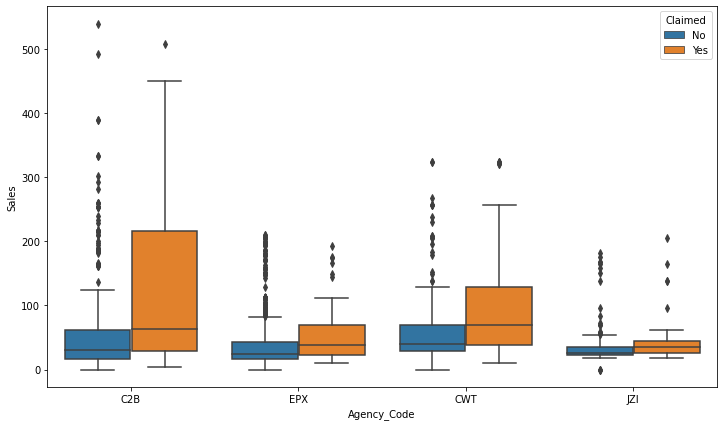

In [26]:
plt.figure(figsize=(12,7))
sns.boxplot('Agency_Code','Sales',hue='Claimed',data=df)

<AxesSubplot:xlabel='Agency_Code', ylabel='Sales'>

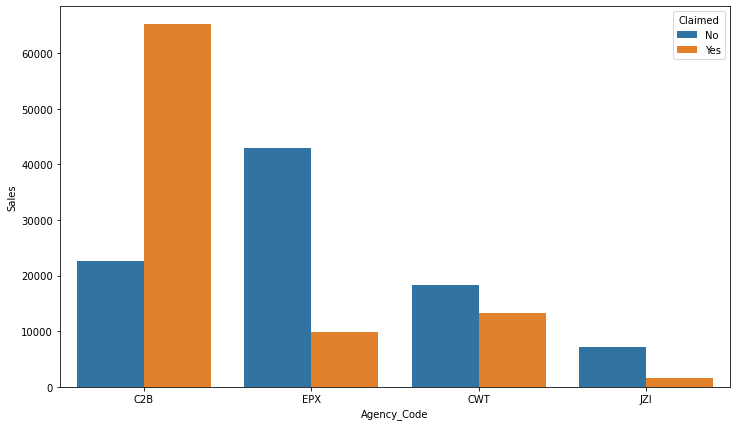

In [56]:
plt.figure(figsize=(12,7))
sns.barplot('Agency_Code','Sales',hue='Claimed',data=df,estimator=np.sum,ci=None)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='Sales'>

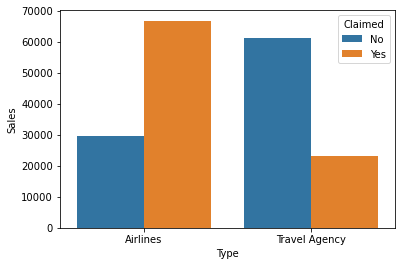

In [49]:
sns.barplot('Type','Sales',hue='Claimed',data=df,estimator=np.sum,ci=None)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

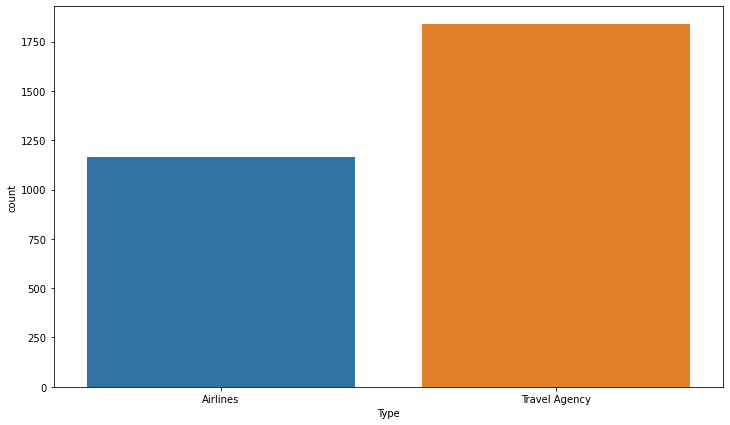

In [27]:
plt.figure(figsize=(12,7))
sns.countplot(df['Type'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='Sales'>

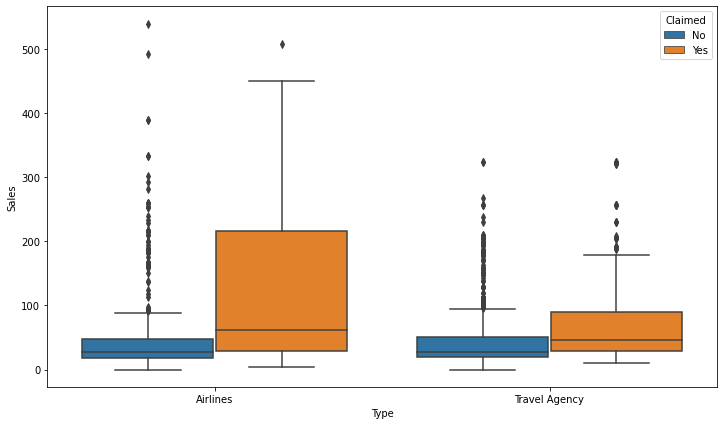

In [28]:
plt.figure(figsize=(12,7))
sns.boxplot('Type','Sales',hue='Claimed',data=df)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

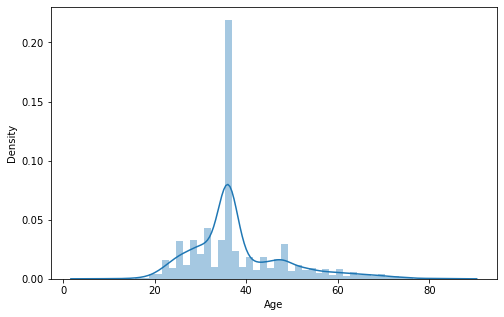

In [29]:
plt.figure(figsize=(8,5))
sns.distplot(df['Age'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

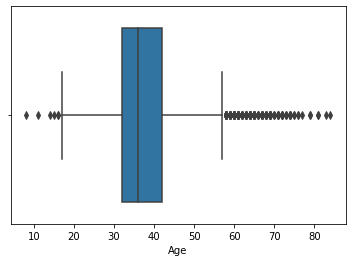

In [30]:
sns.boxplot(df['Age'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Duration'>

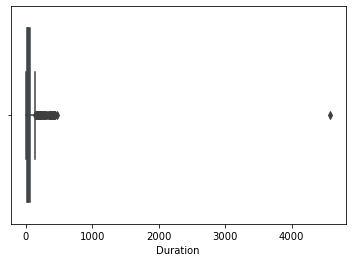

In [31]:
sns.boxplot(df['Duration'])

In [42]:
df[df['Duration']>4000]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2845,48,C2B,Airlines,No,0.09,Online,4580,0.32,Customised Plan,ASIA


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Duration', ylabel='Density'>

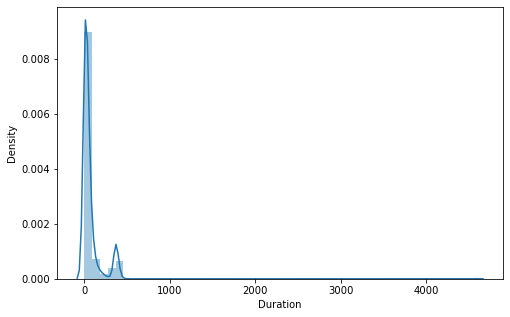

In [32]:
plt.figure(figsize=(8,5))
sns.distplot(df['Duration'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Commision'>

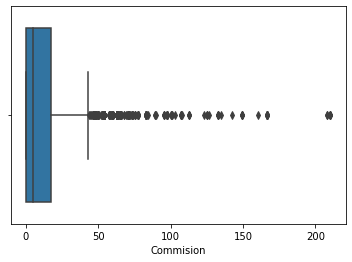

In [33]:
sns.boxplot(df['Commision'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Commision', ylabel='Density'>

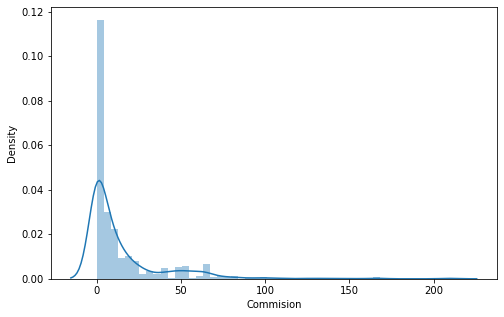

In [34]:
plt.figure(figsize=(8,5))
sns.distplot(df['Commision'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

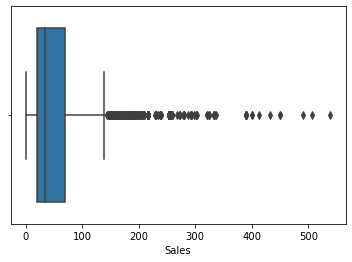

In [35]:
sns.boxplot(df['Sales'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

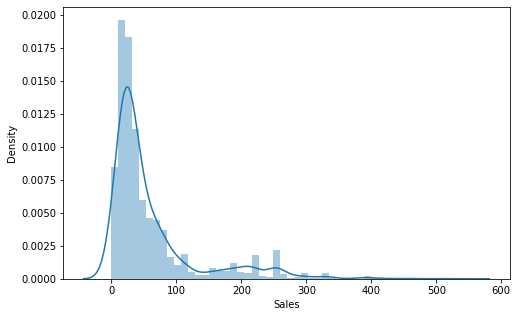

In [36]:
plt.figure(figsize=(8,5))
sns.distplot(df['Sales'])

<AxesSubplot:>

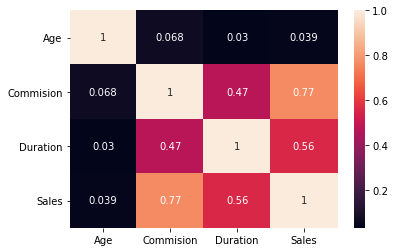

In [37]:
sns.heatmap(df.corr(),annot=True)

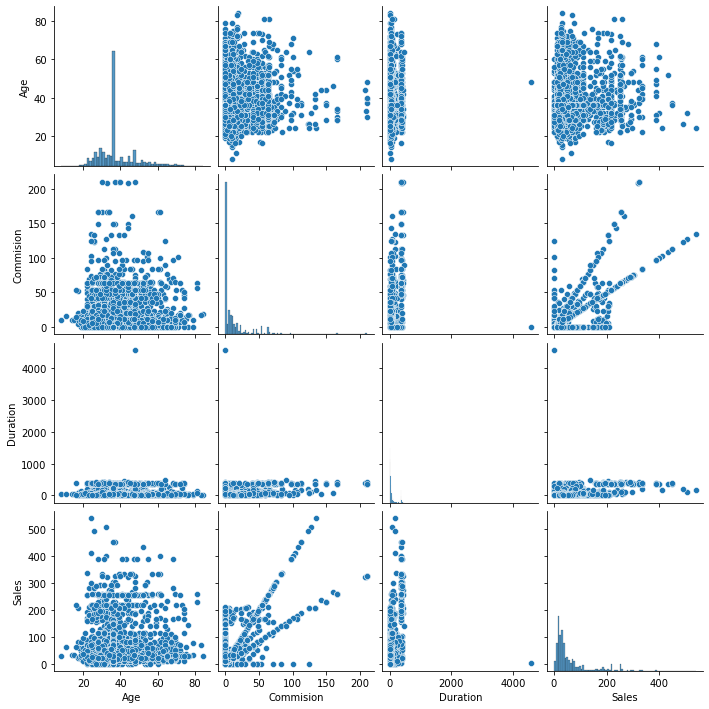

In [38]:
sns.pairplot(df)

In [776]:
#converting categorical variables into numerical values
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=pd.Categorical(df[i]).codes

In [777]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [778]:
#dividing data into target and independent variables
x=df.drop('Claimed',axis=1)
y=df.pop('Claimed')

In [779]:
from sklearn.model_selection import train_test_split

In [780]:
#train-test-split
x_train, x_test, train_labels, test_labels = train_test_split(x,y,test_size=0.30,shuffle=True,random_state=1)

DECISION TREE

In [1611]:
dt_model=DecisionTreeClassifier(criterion='gini')

In [1612]:
dt_model.fit(x_train,train_labels)

DecisionTreeClassifier()

In [17]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Insurance_Tree_File = open('d:\Insurance_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Insurance_Tree_File, feature_names = list(x_train), class_names = list(train_char_label))

Insurance_Tree_File.close()

In [781]:
from sklearn.model_selection import GridSearchCV

In [1595]:
#Grid search for Decision Tree
param_grid = { 'max_depth' : [3,4,5,6,7],
              'min_samples_leaf':[20,30,40],
              'min_samples_split':[100,150,200]
    }
dt_model=DecisionTreeClassifier(random_state=1)
grid_search=GridSearchCV(estimator=dt_model,param_grid=param_grid,cv=5)

In [1596]:
grid_search.fit(x_train, train_labels)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [20, 30, 40],
                         'min_samples_split': [100, 150, 200]})

In [1597]:
#best parameters
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 40, 'min_samples_split': 150}

In [1598]:
best_grid = grid_search.best_estimator_

In [1599]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

In [1600]:
pd.DataFrame(best_grid.feature_importances_,columns=['IMP'],index=x_train.columns)

,IMP
Age,0.026837
Agency_Code,0.604433
Type,0.000000
Commision,0.022468
Channel,0.000000
Duration,0.036379
Sales,0.254797
Product Name,0.055086
Destination,0.000000


AUC: 0.835


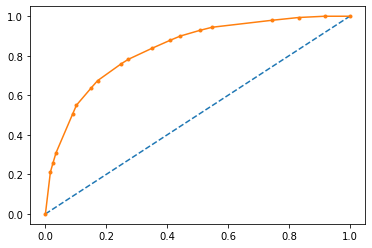

In [1601]:
#ROC Curve
probs = best_grid.predict_proba(x_train)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc1 = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc1)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.796


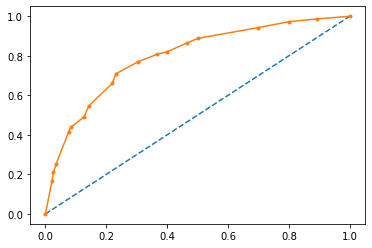

In [1602]:
probs = best_grid.predict_proba(x_test)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc2 = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc2)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [1603]:
from sklearn.metrics import classification_report, confusion_matrix

In [1604]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1471
           1       0.70      0.55      0.62       629

    accuracy                           0.79      2100
   macro avg       0.76      0.72      0.74      2100
weighted avg       0.79      0.79      0.79      2100



In [1605]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       605
           1       0.72      0.44      0.54       295

    accuracy                           0.76       900
   macro avg       0.75      0.68      0.69       900
weighted avg       0.75      0.76      0.74       900



In [1606]:
confusion_matrix(test_labels,ytest_predict)

array([[555,  50],
       [166, 129]], dtype=int64)

In [1607]:
confusion_matrix(train_labels,ytrain_predict)

array([[1321,  150],
       [ 283,  346]], dtype=int64)

In [1608]:
dict=pd.DataFrame(classification_report(train_labels,ytrain_predict,output_dict=True))
cart_train_precision=dict.iloc[0,1]
cart_train_recall=dict.iloc[1,1]
cart_train_f1=dict.iloc[1,1]
cart_train_acc=dict.iloc[0,2]
cart_train_auc=auc1

In [1609]:
dict=pd.DataFrame(classification_report(test_labels,ytest_predict,output_dict=True))
cart_test_precision=dict.iloc[0,1]
cart_test_recall=dict.iloc[1,1]
cart_test_f1=dict.iloc[1,1]
cart_test_acc=dict.iloc[0,2]
cart_test_auc=auc2

RANDOM FOREST

In [1404]:
#Grid search for random forest
param_grid1={'max_depth':[4],
             'max_features':[7],
             'min_samples_leaf':[6],
             'min_samples_split':[60],
             'n_estimators':[500],
    
}
rfcl=RandomForestClassifier(random_state=1)
grid_search1=GridSearchCV(rfcl,param_grid=param_grid1,cv=5)

In [1405]:
grid_search1.fit(x_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [4], 'max_features': [7],
                         'min_samples_leaf': [6], 'min_samples_split': [60],
                         'n_estimators': [500]})

In [1406]:
grid_search1.best_params_

{'max_depth': 4,
 'max_features': 7,
 'min_samples_leaf': 6,
 'min_samples_split': 60,
 'n_estimators': 500}

In [1407]:
best_grid1 = grid_search1.best_estimator_

In [1408]:
pd.DataFrame(best_grid1.feature_importances_,columns=['IMP'],index=x_train.columns)

,IMP
Age,0.023940
Agency_Code,0.476179
Type,0.010413
Commision,0.071874
Channel,0.000981
Duration,0.045407
Sales,0.189102
Product Name,0.179530
Destination,0.002576


In [1409]:
ytrain_predict1 = best_grid1.predict(x_train)
ytest_predict1 = best_grid1.predict(x_test)

In [1410]:
print(classification_report(train_labels,ytrain_predict1))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1471
           1       0.70      0.61      0.65       629

    accuracy                           0.80      2100
   macro avg       0.77      0.75      0.76      2100
weighted avg       0.80      0.80      0.80      2100



In [1411]:
print(classification_report(test_labels,ytest_predict1))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       605
           1       0.75      0.52      0.61       295

    accuracy                           0.79       900
   macro avg       0.77      0.72      0.73       900
weighted avg       0.78      0.79      0.77       900



AUC: 0.843


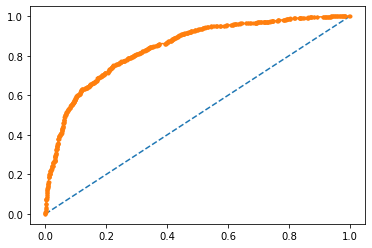

In [1583]:
probs = best_grid1.predict_proba(x_train)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc3 = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc3)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.816


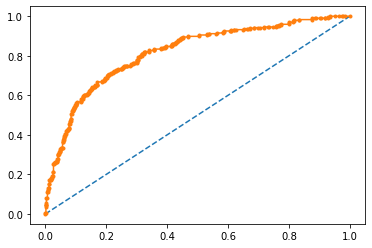

In [1584]:
probs = best_grid1.predict_proba(x_test)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc4 = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc4)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [1198]:
ytrain_predict = best_grid1.predict(x_train)
ytest_predict = best_grid1.predict(x_test)

In [1579]:
confusion_matrix(train_labels,ytrain_predict1)

array([[1305,  166],
       [ 247,  382]], dtype=int64)

In [1580]:
confusion_matrix(test_labels,ytest_predict1)

array([[553,  52],
       [141, 154]], dtype=int64)

In [1585]:
dict=pd.DataFrame(classification_report(train_labels,ytrain_predict1,output_dict=True))
rf_train_precision=dict.iloc[0,1]
rf_train_recall=dict.iloc[1,1]
rf_train_f1=dict.iloc[1,1]
rf_train_acc=dict.iloc[0,2]
rf_train_auc=auc3

In [1589]:
dict=pd.DataFrame(classification_report(test_labels,ytest_predict1,output_dict=True))
rf_test_precision=dict.iloc[0,1]
rf_test_recall=dict.iloc[1,1]
rf_test_f1=dict.iloc[1,1]
rf_test_acc=dict.iloc[0,2]
rf_test_auc=auc4

ANN

In [1201]:
#scaling data for ANN
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_trains = sc.fit_transform(x_train) 
X_tests = sc.transform (x_test)

In [1533]:
#grid search for ANN
param_grid = {
    'hidden_layer_sizes': [(100,100)],
    'activation': ['relu'],
    'solver': [ 'adam'],
    'tol': [0.001],
    'max_iter' : [5000]
}

mlpcl = MLPClassifier(random_state=1)

grid_search2 = GridSearchCV(estimator = mlpcl, param_grid = param_grid, cv = 5)

In [1534]:
grid_search2.fit(X_trains, train_labels)

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=1),
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [(100, 100)], 'max_iter': [5000],
                         'solver': ['adam'], 'tol': [0.001]})

In [1535]:
grid_search2.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100, 100),
 'max_iter': 5000,
 'solver': 'adam',
 'tol': 0.001}

In [1536]:
best_grid2 = grid_search2.best_estimator_

AUC: 0.877


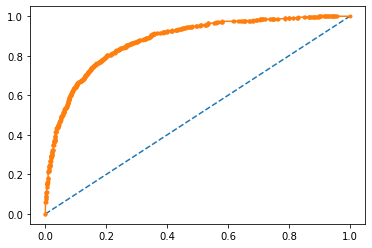

In [1575]:
probs = best_grid2.predict_proba(X_trains)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc5 = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc5)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.801


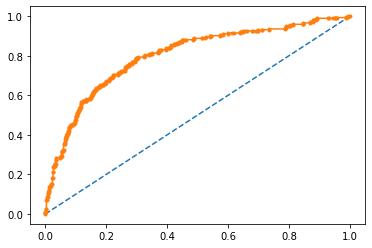

In [1576]:
probs = best_grid2.predict_proba(X_tests)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc6 = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc6)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [1539]:
ytrain_predict2 = best_grid2.predict(X_trains)
ytest_predict2 = best_grid2.predict(X_tests)

In [1540]:
print(classification_report(train_labels,ytrain_predict2))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1471
           1       0.72      0.67      0.69       629

    accuracy                           0.82      2100
   macro avg       0.79      0.78      0.79      2100
weighted avg       0.82      0.82      0.82      2100



In [1541]:
print(classification_report(test_labels,ytest_predict2))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       605
           1       0.70      0.52      0.60       295

    accuracy                           0.77       900
   macro avg       0.75      0.71      0.72       900
weighted avg       0.76      0.77      0.76       900



In [1542]:
confusion_matrix(train_labels,ytrain_predict2)

array([[1312,  159],
       [ 210,  419]], dtype=int64)

In [1543]:
confusion_matrix(test_labels,ytest_predict2)

array([[540,  65],
       [141, 154]], dtype=int64)

In [1592]:
dict=pd.DataFrame(classification_report(test_labels,ytest_predict2,output_dict=True))
nn_test_precision=dict.iloc[0,1]
nn_test_recall=dict.iloc[1,1]
nn_test_f1=dict.iloc[1,1]
nn_test_acc=dict.iloc[0,2]
nn_test_auc=auc6

In [1593]:
dict=pd.DataFrame(classification_report(train_labels,ytrain_predict2,output_dict=True))
nn_train_precision=dict.iloc[0,1]
nn_train_recall=dict.iloc[1,1]
nn_train_f1=dict.iloc[1,1]
nn_train_acc=dict.iloc[0,2]
nn_train_auc=auc5

In [1610]:
#comparison of all models
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.79,0.76,0.80,0.79,0.82,0.77
AUC,0.84,0.80,0.84,0.82,0.88,0.80
Recall,0.55,0.44,0.61,0.52,0.67,0.52
Precision,0.70,0.72,0.70,0.75,0.72,0.70
F1 Score,0.55,0.44,0.61,0.52,0.67,0.52
